Many time series display a repeating, cyclical sort of behavior. Examples might include the regular shift between dry and wet seasons in many areas of the world. This sort of repeating, cyclical behavior is often referred to as seasonality or periodic behavior. In some cases the length of time, or period, over which that repeating behavior occurs is relatively clear, such as with wet and dry seasons, but in other cases that information is not quite as clear. One tool for deriving that information is the Power Spectral Density (PSD) of a time series. This exercise will focus on creating and interpreting PSD's.

As with the previous steps, before we can start working on this step we need to import some libraries that provide us with predefined functionality for numerical/statistical computing and visualizing the results of our work. Executing the following cell will import the libraries we need. The last three lines of code here adjust some settings for the visualizations we'll create later.

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.signal import periodogram
from statsmodels.tsa.arima_process import arma_generate_sample as arma
from scipy.ndimage.filters import gaussian_filter

plt.style.use('ggplot')
fig_size = [9,6]
plt.rcParams['figure.figsize'] = fig_size

We're going to start again by generating a series of white noise. Step 1 of this unit provides a little more background on white noise and what this line of code does.

<AxesSubplot:>

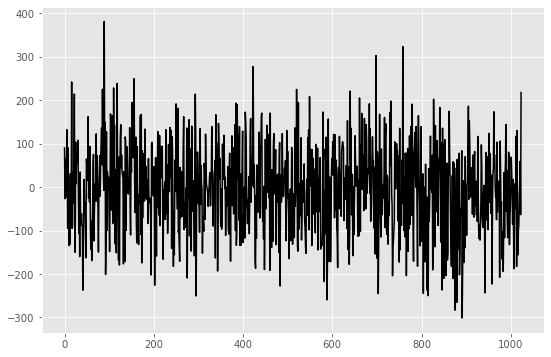

In [2]:
# Create and plot our white noise series, the code is a little different here than in the previous steps. This is for 
# consistency with the next few examples.
ar = np.array([1, 0])
ma = np.array([1, 0])
wn_series = pd.Series(arma(ar, ma, 1024, 100))
wn_series.plot(color='k')

<ipython-input-5-60f1f703aa56>:7: RuntimeWarning: divide by zero encountered in true_divide
  ax.plot((1.0/fs_wn), gaussian_filter(Pxx_wn, sigma=3), color='r')


Text(0, 0.5, 'PSD')

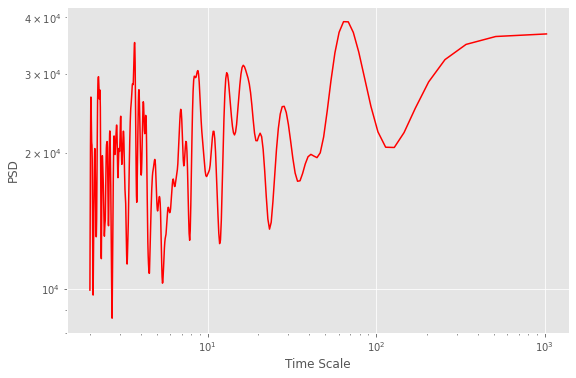

In [5]:
# Now we'll compute the information needed to create the PSD for our white noise and we'll plot the PSD. The 
# first line of code here uses a function called 'periodogram' to create the needed information. The rest of 
# the code creates and formats plot. For the sake of interpretability we'll be smoothing the PSD sightly, we'll
# also do the same for the rest of the PSD's we plot. 
fs_wn, Pxx_wn = periodogram(x=wn_series, return_onesided=True)
f, ax = plt.subplots()
ax.plot((1.0/fs_wn), gaussian_filter(Pxx_wn, sigma=3), color='r')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Time Scale')
ax.set_ylabel('PSD')

So, what are we looking at here?

On the x-axis we have frquency, or a measure of how fast or slow a signal is oscillating. Large x-values, or low frequencies, indicate slower oscillations. Small x-values, or high frequencies, indicate faster oscillations. On the y-axis is the PSD. This gives us information about how strongly a signal tends to oscillate at a particular frequency. Since we're working with white noise here, the PSD is fairly even across all of the frequencies being considered. This is as expected and is actually the behavior that gives rise to white noise being called "white noise". White light is composed of similar intensity at all frequencies within the visible portion of the electromagnetic spectrum; similarly, white noise exhibits similar power across all frequencies. Similar tools can be used to study spectral characteristics of light and the frequency domain behavior of times series.

Next, we'll be creating blue noise and red noise for comparative purposes. These names are also inspired by light and spectral analysis. If you're familiar with the electromagnetic spectrum and the difference between the wavelength of blue and red light, can you guess how the PSD of blue and red noise might differ?

<AxesSubplot:>

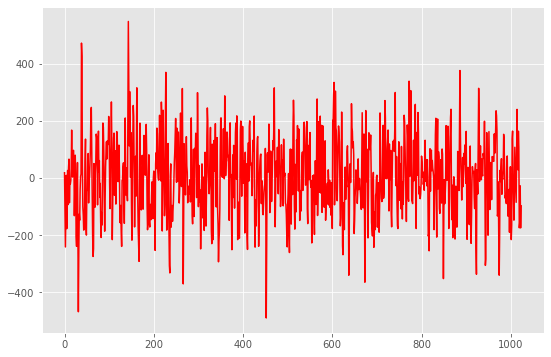

In [6]:
# create and plot red noise
red_ar = np.array([1, 0.05, 0.05])
red_ma = np.array([1, 0.9])
red_series = pd.Series(arma(red_ar, red_ma, 1024, 100))
red_series.plot(color='r')

<AxesSubplot:>

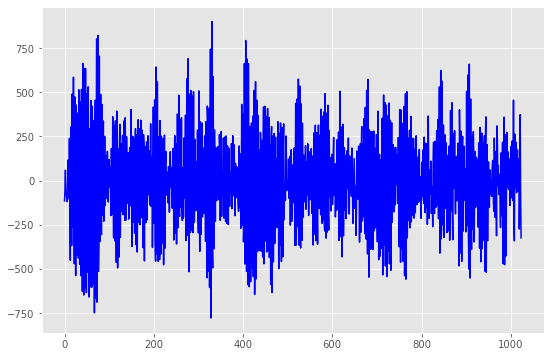

In [7]:
# create and plot blue noise
blue_ar = np.array([1, 0.9, 0.9])
blue_ma = np.array([1, 0.9])
blue_series = pd.Series(arma(blue_ar, blue_ma, 1024, 100))
blue_series.plot(color='b')

<ipython-input-8-4e7ae792eb0f>:6: RuntimeWarning: divide by zero encountered in true_divide
  ax.plot((1/fs_red), gaussian_filter(Pxx_red, sigma=2), color='r')
<ipython-input-8-4e7ae792eb0f>:7: RuntimeWarning: divide by zero encountered in true_divide
  ax.plot((1/fs_blue), gaussian_filter(Pxx_blue, sigma=2), color='b')


Text(0, 0.5, 'PSD')

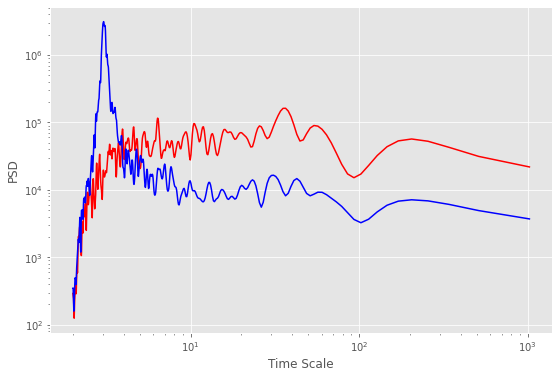

In [8]:
# Now we'll create and plot the PSD of each series
fs_red, Pxx_red = periodogram(x=red_series, return_onesided=True)
fs_blue, Pxx_blue = periodogram(x=blue_series, return_onesided=True)

f, ax = plt.subplots()
ax.plot((1/fs_red), gaussian_filter(Pxx_red, sigma=2), color='r')
ax.plot((1/fs_blue), gaussian_filter(Pxx_blue, sigma=2), color='b')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time Scale')
ax.set_ylabel('PSD')

These PSDs are both noisy since we're dealing with random data, but the behavior of each is quite different. Each of the PSDs is also rather different from the PSD of our initial white noise series. Let's take a few moments to think about the differences between each.

The blue noise PSD is shifted towards small x-axis values, or high frequencies (i.e. cycles per unit of time). This means that the blue noise series tends to oscillate more strongly at short time scales. The red noise PSD is shifted towards larger x-axis values, or lower frequencies. This means that the red noise series tends to oscillate more strongly at longer time scales. If we go back to the visible light analogy, frequency and wavelength are inversely proportional to one another; i.e. high frequency equates to short wavelength and low frequency equates to long wavelength. As with white noise, this is where the names for blue and red noise come from. Blue light has a short wavelength and a high frequency (like our blue noise), and red light has a long wavelength and a low frequency (like our red noise).

Now that we have some background examples out of the way, let's start working with PSDs - or periodograms - of real data and try to get meaningful information from them. The following examples use data from the Neuse River, a culturally, ecologically, and economically important river in the southeastern United States. The Neuse River drains an area of more than 15,000 square kilometers and experiences a temperate climate with precipitation - mostly rain - distributed relatively uniformly throughout the year.  For more on the river see this link from the North Carolina Office of Environmental Education: https://www.eenorthcarolina.org/media/16/open

<AxesSubplot:xlabel='date'>

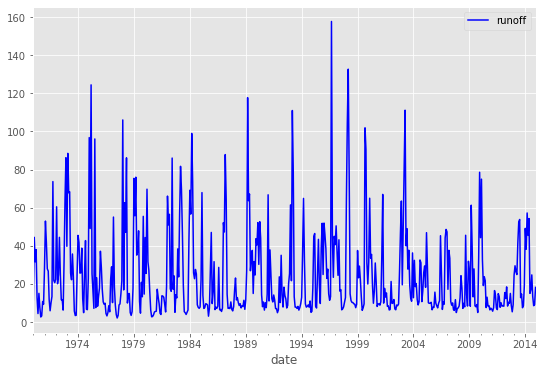

In [11]:
# We'll start by first considering the same streamflow data that we used in the previous step, let's begin
# by loading and plotting the data. Don't forget to update the file path as needed
r_data = pd.read_csv('neuse_streamflow.csv')
r_data['date'] = pd.to_datetime(r_data['date'])
r_data.set_index('date', inplace=True)
r_data.plot(color='b')

<ipython-input-13-d8ab7e8ecb22>:5: RuntimeWarning: divide by zero encountered in true_divide
  ax.plot((1/fs_stream), gaussian_filter(Pxx_stream, sigma=2), color='r')


Text(0, 0.5, 'PSD')

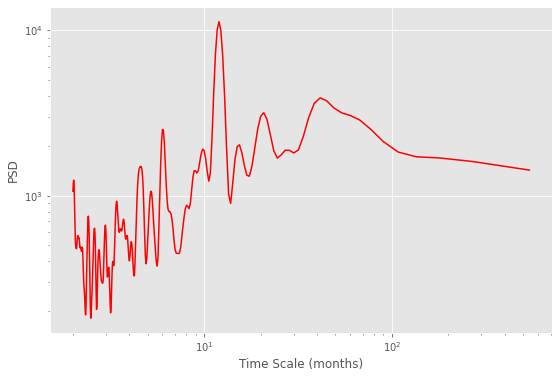

In [13]:
# Now we'll ccompute and plot the PSD for this streamflow data, keep in mind that the data are monthly.
fs_stream, Pxx_stream = periodogram(x=r_data['runoff'], return_onesided=True)

f, ax = plt.subplots()
ax.plot((1/fs_stream), gaussian_filter(Pxx_stream, sigma=2), color='r')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time Scale (months)')
ax.set_ylabel('PSD')

What information can we get from this periodogram?

Let's start with the large peak where x is approximately equal to 12 (note the logarithmic x-axis). This means that the streamflow data we're working with osciallate most strongly at a time scale of 12 months - in other words, annual variability is dominant here. There's another small peak at roughly x = 6 months, or semi-annual/seasonal variability. We also see fairly high power at low frequencies, this represents longer term, multi-year variability of the sort that might be linked to low frequency climate variability like the El Nino Southern Oscillation or the Pacific Decadal Oscillation.

<AxesSubplot:xlabel='date'>

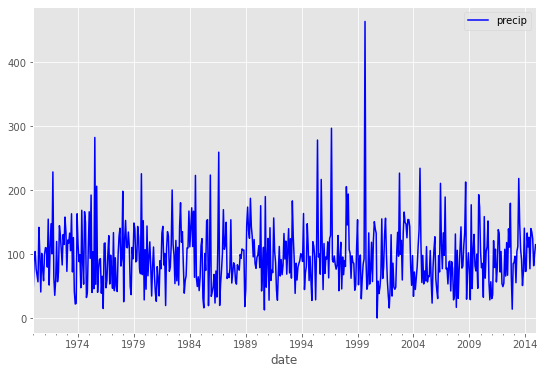

In [14]:
# Now let's compare the behavior of our streamlfow data to precipitation from the same watershed (this is
# the same data you worked with in the previous step). Again, update the file path if needed.
p_data = pd.read_csv('neuse_precipitation.csv')
p_data['date'] = pd.to_datetime(p_data['date'])
p_data.set_index('date', inplace=True)
p_data.plot(color='b')

<ipython-input-15-4bde3251efa7>:5: RuntimeWarning: divide by zero encountered in true_divide
  ax.plot((1/fs_precip), gaussian_filter(Pxx_precip, sigma=2), color='b')


Text(0, 0.5, 'PSD')

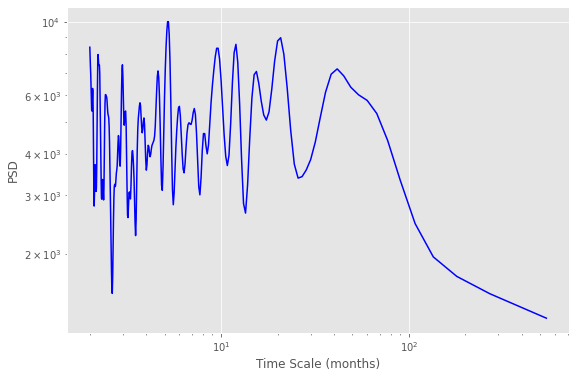

In [15]:
# Now plot the PSD for this precipitation data
fs_precip, Pxx_precip = periodogram(x=p_data['precip'], return_onesided=True)

f, ax = plt.subplots()
ax.plot((1/fs_precip), gaussian_filter(Pxx_precip, sigma=2), color='b')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time Scale (months)')
ax.set_ylabel('PSD')

We definitely observe annual (12 month) and seasonal (6 month) variability, but quite a bit of high frequency variability as well. The seasonal and annual variability here agree with what we saw in the streamflow periodogram, but the high frequency variability observed here does not appear in the streamflow periodogram.

Can you think of a reason why the precipitation record may have more high freuqency variability than the streamflow record? Could this be related to the concept of memory effects that was raised at the end of step 2? Is there another important hydroclimate flux that might dampening the expression of this high frequency precipitation variability in the behavior of streamflow? (Hint: Consider the watershed water balance.)

Before transitioning to the final example, you may want to re-familiarize yourself with the El Nino - Southern Oscillation (ENSO) phenomenon. The abstract and introduction of this short article can help: https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2008GL036054

<AxesSubplot:xlabel='Date'>

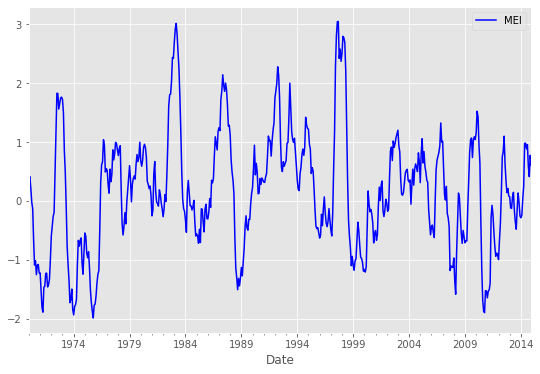

In [16]:
# As a final example let's take a look at the MEI (a proxy for the El Nino Southern Oscillation). Again, update
# the file path as needed.
mei_data = pd.read_csv('mei_vec.csv')
mei_data['Date'] = pd.to_datetime(mei_data['Date'])
mei_data.set_index('Date', inplace=True)
mei_data.plot(color='b')

<ipython-input-17-7a4668b3651a>:5: RuntimeWarning: divide by zero encountered in true_divide
  ax.plot((1/fs_mei), gaussian_filter(Pxx_mei, sigma=2), color='r')


Text(0, 0.5, 'PSD')

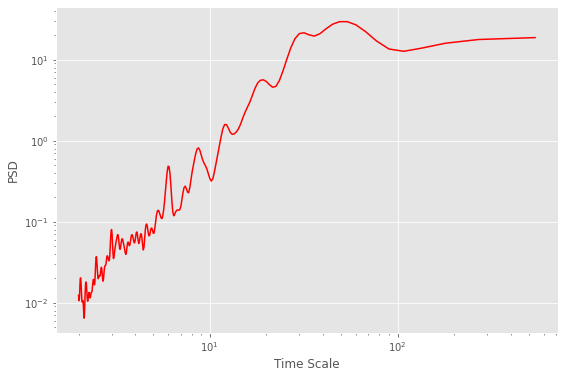

In [17]:
# Now the PSD for the MEI
fs_mei, Pxx_mei = periodogram(x=mei_data['MEI'], return_onesided=True)

f, ax = plt.subplots()
ax.plot((1/fs_mei), gaussian_filter(Pxx_mei, sigma=2), color='r')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time Scale')
ax.set_ylabel('PSD')

This is dominanted by lower frequency variability. In particular, there's a bit of a bump in the PSD between roughly 24 months and roughly 84 months. 

What does this tell you about the time scale at which MEI (and ENSO) tends to vary most strongly? Does this agree with current knowledge concerning ENSO variability?

References and Additional Reading:
Anderson Jr, W. P., & Emanuel, R. E. (2008). Effect of interannual and interdecadal climate oscillations on groundwater in North Carolina. Geophysical Research Letters, 35(23).

North Carolina Office of Environmental Education https://www.eenorthcarolina.org/media/16/open

Rice, J. S., & Emanuel, R. E. (2017). How are streamflow responses to the E l N ino S outhern O scillation affected by watershed characteristics?. Water Resources Research, 53(5), 4393-4406.